In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
with open(r'/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/monkey_active_learning_results.sav', 'rb') as fr:
    [X_train_list, Y_train_list, iterX_f1_scores_list, iterX_macro_scores_list, iterX_predict_prob_list, sampled_idx_list] = joblib.load(fr)
with open(r'/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/monkey_using_all_train.sav', 'rb') as fr:
    [features_runlist, targets_runlist,
     peak_f1_scores, peak_macro_scores, peak_predict_prob] = joblib.load(fr)

In [3]:
f1_ = []
macro_avg_ = []
for j in range(len(iterX_f1_scores_list)):
    f1_.append(np.array(iterX_f1_scores_list[j]))
    macro_avg_.append(np.array(iterX_macro_scores_list[j]))

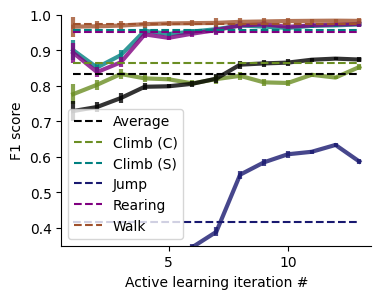

In [4]:
behavior_types = ['Average', 'Climb (C)', 'Climb (S)', 'Jump', 'Rearing', 'Walk']
cmap_beh = ['olivedrab', 'teal', 'midnightblue', 'purple', 'sienna']
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
for b in range(len(cmap_beh)):
    x = np.arange(len(f1_))
    y = np.mean(f1_, axis=1)[:, b]
    y_err = np.std(macro_avg_, axis=1)
    ax.errorbar(x, y, yerr=y_err, barsabove=True, lw=3,
                color=cmap_beh[b], ecolor=cmap_beh[b], alpha=0.8, elinewidth=3)

x_all = np.arange(len(macro_avg_))
y_all = np.mean(macro_avg_, axis=1)
std_all = np.std(macro_avg_, axis=1)
plot, caps, bar = ax.errorbar(x_all, y_all, yerr=std_all, barsabove=True, lw=3,
                              color='k', ecolor='k', alpha=0.8, elinewidth=3)

ax.set_xticks(np.arange(4, len(macro_avg_), 5))
ax.set_xticklabels(np.arange(5, len(macro_avg_)+1, 5))
ax.set_ylabel('F1 score')
ax.set_xlabel('Active learning iteration #')
ax.set_ylim([0.35, 1])

ax.hlines(np.mean(peak_macro_scores, axis=0), 0, len(macro_avg_)-1, ls='--', color='k')
for b in range(len(cmap_beh)):
    ax.hlines(np.mean(peak_f1_scores, axis=0)[b], 0, len(macro_avg_)-1, ls='--', color=cmap_beh[b])
ax.set_xlim([-.5, len(macro_avg_)-.5])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(behavior_types)
plt.show()

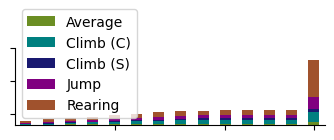

In [5]:
## plot counts
fig, ax = plt.subplots(1, 1, figsize=(4, 1))
class_counts_per = [np.hstack([np.mean([len(np.where(Y_train_list[it][i]==b)[0])
                                        for i in range(len(Y_train_list[it]))])
                               for it in range(len(Y_train_list))])
                    for b in np.unique(Y_train_list[0][0])]

class_counts_total = [len(np.where(targets_runlist[0][targets_runlist[0] < 5] == b)[0])
                      for b in np.unique(targets_runlist[0]) if b < 5]
df = pd.DataFrame(np.vstack((np.array(class_counts_per).T, np.array(class_counts_total))))
df.plot(kind='bar', stacked=True, legend=False, color=cmap_beh, ax=ax)
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.set_xticks(np.hstack((np.arange(4, 13, 5), 13)))
ax.set_yticks(np.arange(200, 1401, 600))
ax.legend(behavior_types)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()


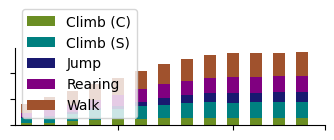

In [6]:
behavior_types = ['Climb (C)', 'Climb (S)', 'Jump', 'Rearing', 'Walk']
## plot average counts across 20 seeds, and compare with all avail training
fig, ax = plt.subplots(1, 1, figsize=(4, 1))
df = pd.DataFrame(np.vstack((np.array(class_counts_per).T)))
df.plot(kind='bar', stacked=True, legend=False, color=cmap_beh, ax=ax)
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.set_xticks(np.hstack((np.arange(4, 13, 5), 13)))
ax.set_yticks(np.arange(0, 300, 100))
ax.legend(behavior_types)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()